In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10, 6)
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")

 Engine Size(L), Fuel Consumption Comb (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption City (L/100 km), CO2 Emissions(g/km)

DATASET DESCRIPTION
This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The columns of this dataset are

Model
Make
Engine Size(L)
Cylinders
Fuel Type
Fuel Consumption City (L/100 km)
Fuel Consumption Hwy (L/100 km)
Fuel Consumption Comb (mpg and L/100 km)
Vehicle class
Transmission

In [ ]:
df = pd.read_csv("co2.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
# check duplicates
df.duplicated().sum()

1103

In [ ]:
#drop duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: flo

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [ ]:
df.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


<Axes: >

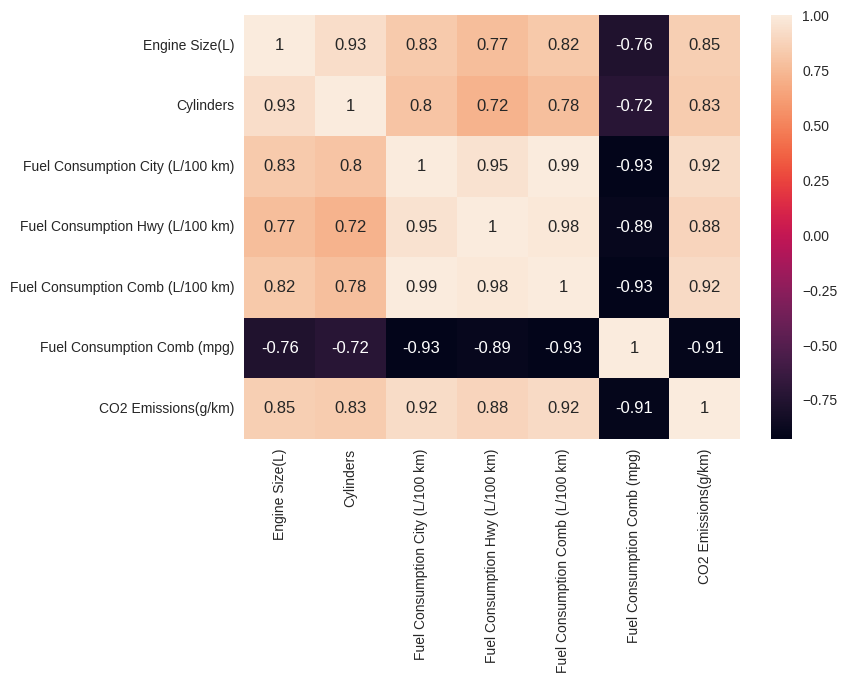

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
from scipy.stats import skew


In [ ]:
numeric_columns = df.drop(columns='CO2 Emissions(g/km)').select_dtypes(include='number').columns
for column in numeric_columns:
    skewness = skew(df[column])
    print(f'{column}: Skewness = {skewness}')

Engine Size(L): Skewness = 0.8117744950654155
Cylinders: Skewness = 1.1073300961230863
Fuel Consumption City (L/100 km): Skewness = 0.8390148556696516
Fuel Consumption Hwy (L/100 km): Skewness = 1.1082420896641751
Fuel Consumption Comb (L/100 km): Skewness = 0.9237816872350468
Fuel Consumption Comb (mpg): Skewness = 0.9225554718356972


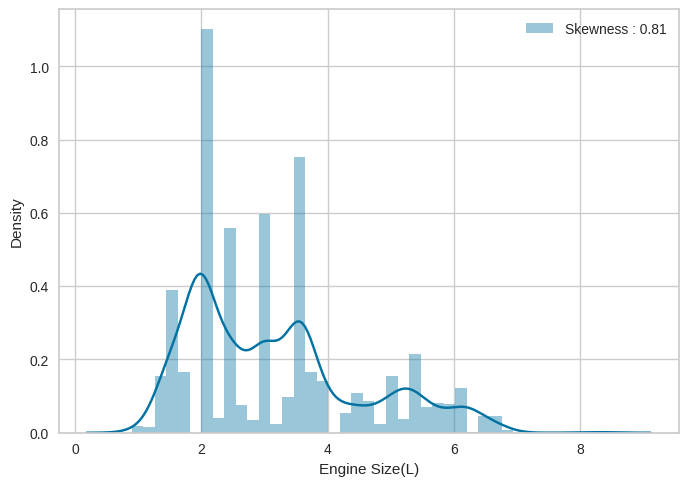

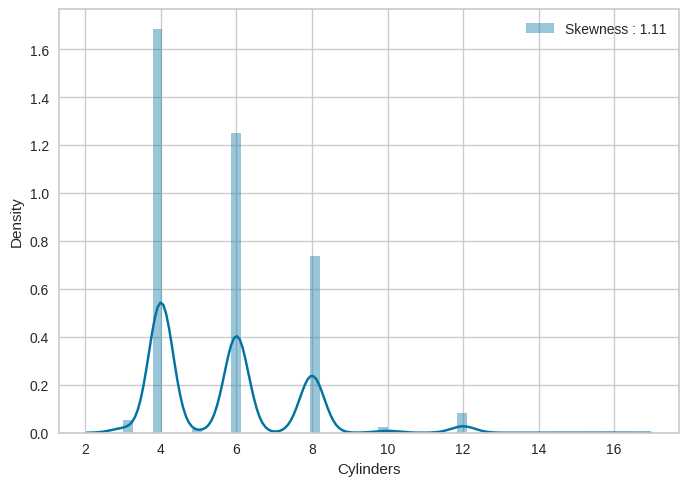

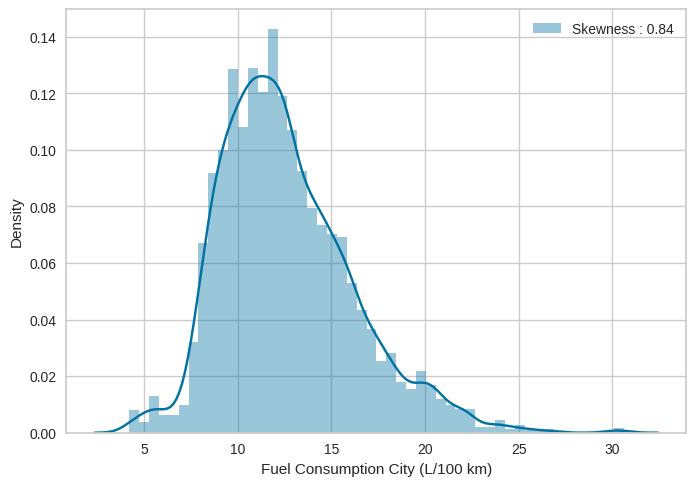

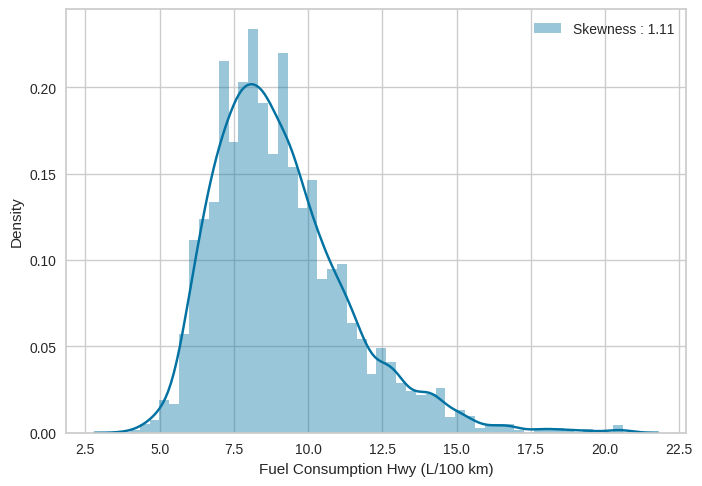

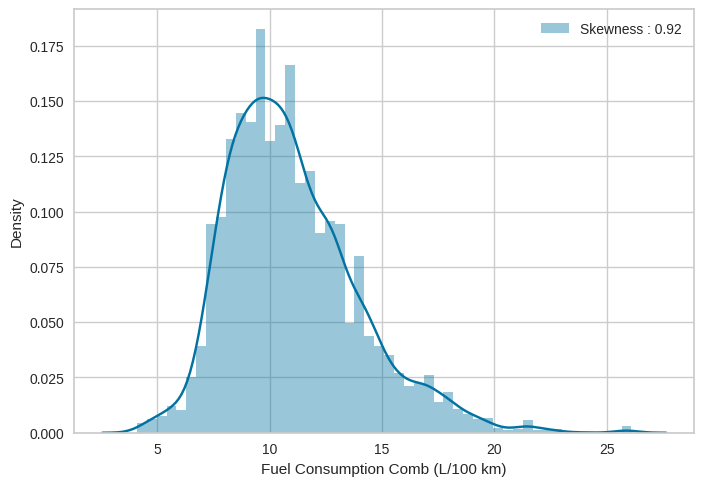

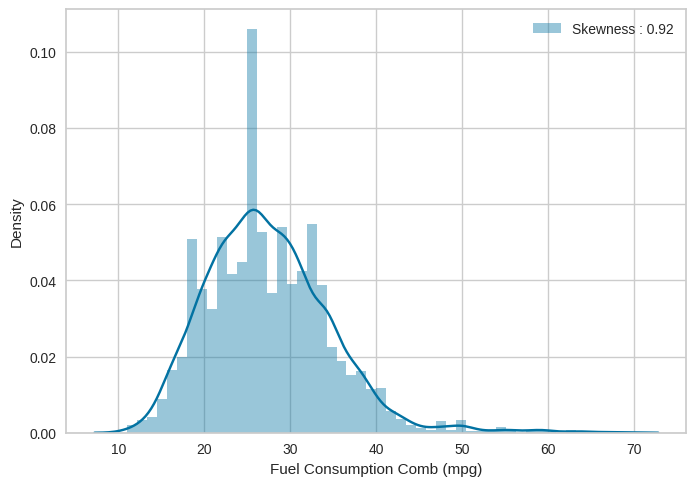

In [ ]:
numeric_columns = df.drop(columns='CO2 Emissions(g/km)').select_dtypes(include='number').columns
for j in numeric_columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))   #  j sütununa ait veri dağılımı grafiği çiziliyor. grafiğin üzerinde gösterilen etiketi oluşturur. Etiket, o sütunun çarpıklık değerini (skewness) içerir
    g = g.legend(loc= "best")   #  grafiğin üzerine eklenen etiketin konumunu en iyi yere yerleştirmes
    plt.show()

We see categorical columns the graph above

## Train-Test Split

In [ ]:

selected_columns = ['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)']
df_selected = df[selected_columns]


X = df_selected.drop('CO2 Emissions(g/km)', axis=1)
y = df_selected['CO2 Emissions(g/km)']

# shortened names of columns
X.columns = ['Engine_Size', 'Fuel_Comb', 'Fuel_Hwy', 'Fuel_City']
y.name = 'CO2_Emissions'


In [ ]:
print(X,y)

      Engine_Size  Fuel_Comb  Fuel_Hwy  Fuel_City
0             2.0        8.5       6.7        9.9
1             2.4        9.6       7.7       11.2
2             1.5        5.9       5.8        6.0
3             3.5       11.1       9.1       12.7
4             3.5       10.6       8.7       12.1
...           ...        ...       ...        ...
7380          2.0        9.4       7.7       10.7
7381          2.0        9.9       8.3       11.2
7382          2.0       10.3       8.6       11.7
7383          2.0        9.9       8.3       11.2
7384          2.0       10.7       8.7       12.2

[6282 rows x 4 columns] 0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2_Emissions, Length: 6282, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)

In [ ]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5025, 4)
y Train features shape: (5025,)
X Test features shape : (1257, 4)
Y Test features shape : (1257,)


In [ ]:
X_train.head(4)

,Engine_Size,Fuel_Comb,Fuel_Hwy,Fuel_City
6622,2.0,9.2,8.2,10.0
106,4.4,12.7,9.8,15.0
1503,5.0,12.4,9.5,14.9
3144,2.7,9.2,7.4,10.7


##Model Fitting and Compare Actual and Predicted Labels

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred=model.predict(X_train)

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
eval_metric (y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8736251004252842
MAE 		: 13.782463753651758
MSE 		: 441.134540891398
RMSE 		: 21.003203110273393


##Evaluate Test Data

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.coef_

array([13.24800312,  4.60779604,  2.39228952,  5.7898661 ])

In [ ]:
model.intercept_

63.68701046221773

In [ ]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual":y_test - y_pred}

In [ ]:
comparing = pd.DataFrame(my_dict)
comparing.head(5)

,Actual,pred,residual
3003,322,261.389647,60.610353
5970,242,240.585966,1.414034
2394,300,280.929440,19.070560
6020,275,264.381661,10.618339
3416,245,241.424675,3.575325


In [ ]:
#Metrics
eval_metric (y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.870800810309089
MAE 		: 14.231951304274341
MSE 		: 466.24392409113926
RMSE 		: 21.592682188443828


In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):

    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

In [ ]:
ls = train_val(y_train,y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.873625,0.870801
mae,13.782464,14.231951
mse,441.134541,466.243924
rmse,21.003203,21.592682


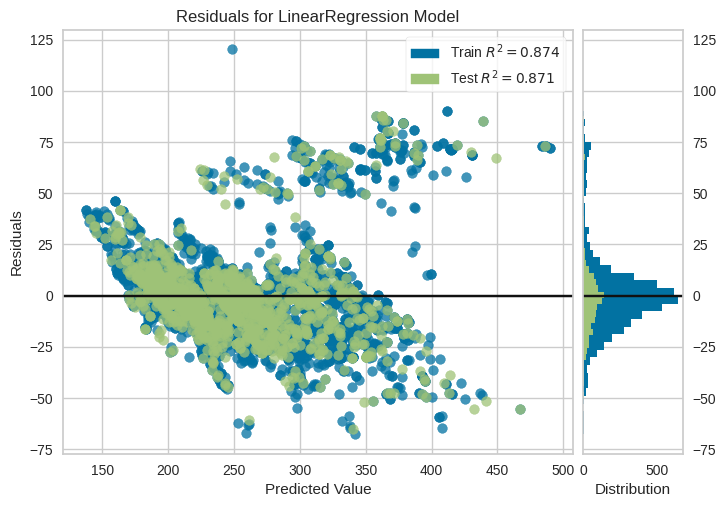

In [ ]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [ ]:
result_sample = comparing.head(25)
result_sample

,Actual,pred,residual
3003,322,261.389647,60.610353
5970,242,240.585966,1.414034
2394,300,280.929440,19.070560
6020,275,264.381661,10.618339
3416,245,241.424675,3.575325
2404,220,211.188606,8.811394
2324,284,264.027672,19.972328
3286,270,233.529153,36.470847
4307,274,264.516420,9.483580
561,306,307.091951,-1.091951


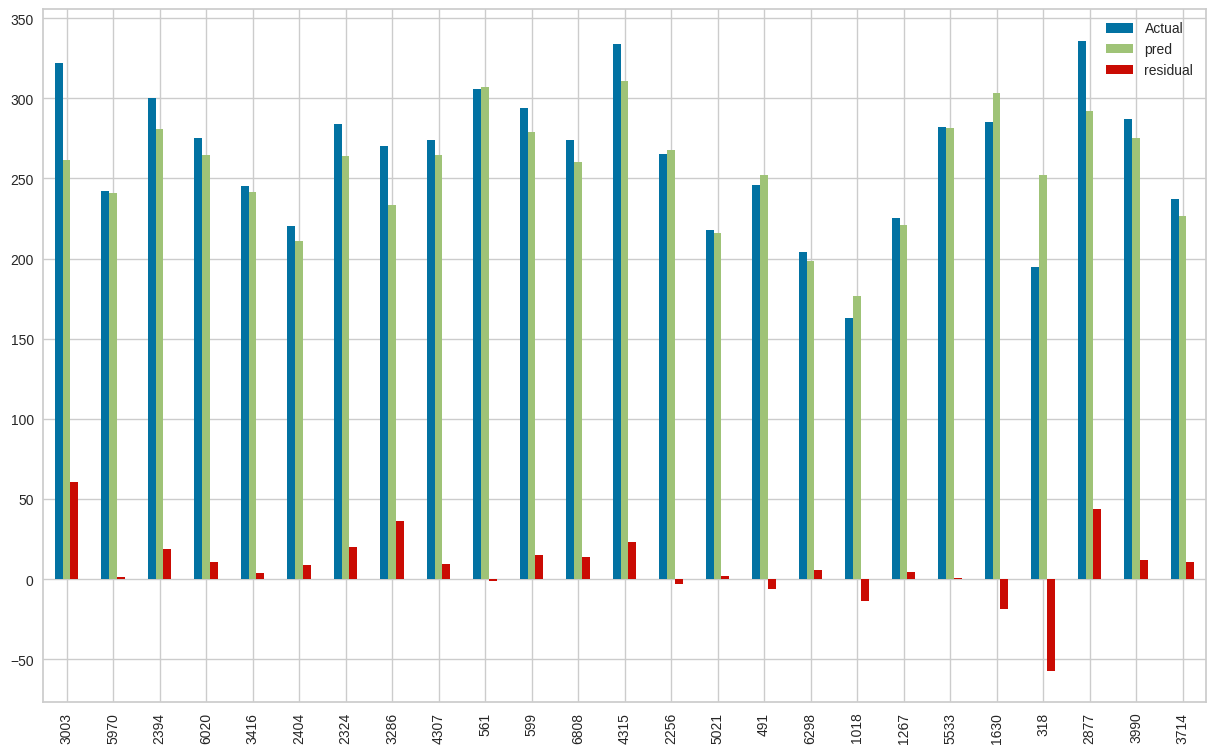

In [ ]:
result_sample.plot(kind="bar", figsize = (15,9))
plt.show()

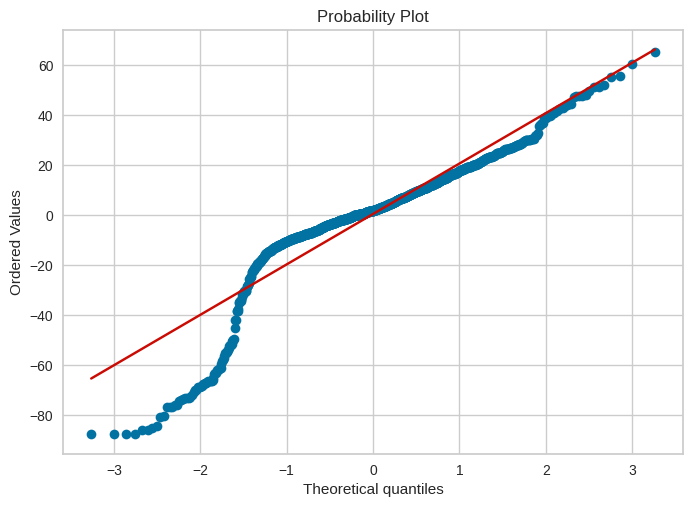

In [ ]:
residuals = y_test - y_pred
stats.probplot(residuals, dist = "norm", plot=plt);

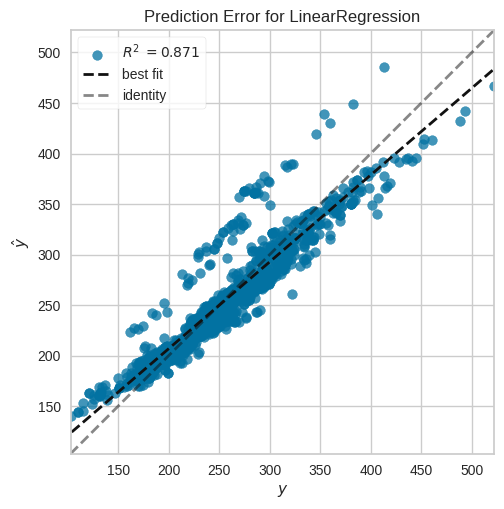

In [ ]:
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

##Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Checking mean = 0 and StdDev =1

In [ ]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3
mean,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0


In [ ]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3
mean,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0


##Linear Regression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred_scaled = lm.predict(X_test_scaled)
y_train_scaled_pred = lm.predict(X_train_scaled)

In [ ]:
lsc = train_val(y_train,y_train_scaled_pred, y_test, y_pred_scaled, "linearscaled")
lsc

,linearscaled_train,linearscaled_test
R2,0.873625,0.870801
mae,13.782464,14.231951
mse,441.134541,466.243924
rmse,21.003203,21.592682


##L2 Regularizasyonu (Ridge)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha = 1.0, random_state = 42)

In [ ]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [ ]:
y_pred = ridge_model.predict(X_test_scaled)

y_train_pred = ridge_model.predict(X_train_scaled)

In [ ]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.873625,0.870811
mae,13.782393,14.231283
mse,441.134751,466.205535
rmse,21.003208,21.591793


In [ ]:
pd.concat([lsc, ls, rs], axis = 1)

,linearscaled_train,linearscaled_test,linear_train,linear_test,ridge_train,ridge_test
R2,0.873625,0.870801,0.873625,0.870801,0.873625,0.870811
mae,13.782464,14.231951,13.782464,14.231951,13.782393,14.231283
mse,441.134541,466.243924,441.134541,466.243924,441.134751,466.205535
rmse,21.003203,21.592682,21.003203,21.592682,21.003208,21.591793


##Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
from sklearn.metrics import SCORERS

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =["r2", 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [ ]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004396,0.037201,0.870277,-14.037143,-469.791601,-21.674676
2,0.020498,0.002665,0.887430,-14.103986,-445.106366,-21.097544
3,0.015126,0.015515,0.867785,-13.980131,-460.399045,-21.456911
4,0.020621,0.002965,0.844822,-15.346051,-565.209502,-23.774135
5,0.024515,0.002611,0.881315,-13.428835,-402.106587,-20.052596
6,0.012275,0.002444,0.862174,-14.305007,-477.682203,-21.855942
7,0.011768,0.002719,0.889685,-12.650711,-372.555744,-19.301703
8,0.010929,0.009763,0.852437,-13.294592,-439.459148,-20.963281
9,0.004077,0.002468,0.873535,-13.962919,-429.798718,-20.731587
10,0.003679,0.002174,0.894884,-12.920893,-368.623038,-19.199558


In [ ]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                               0.872434
test_neg_mean_absolute_error        -13.803027
test_neg_mean_squared_error        -443.073195
test_neg_root_mean_squared_error    -21.010793
dtype: float64

In [ ]:
model = Ridge(alpha = 1, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train,
                       scoring = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                        cv = 5)

In [ ]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.007082,0.003622,0.879637,-14.058471,-456.355271,-21.362473
2,0.007261,0.002418,0.856033,-14.583079,-513.512024,-22.660804
3,0.017424,0.017124,0.871844,-13.870522,-439.520529,-20.964745
4,0.022614,0.002452,0.872469,-12.883773,-404.270197,-20.106472
5,0.005550,0.002088,0.883880,-13.625138,-402.755611,-20.068772


In [ ]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                               0.872773
test_neg_mean_absolute_error        -13.804196
test_neg_mean_squared_error        -443.282726
test_neg_root_mean_squared_error    -21.032653
dtype: float64

##en iyi alpha değerini RMSE ye göre

In [ ]:
from sklearn.linear_model import Ridge,RidgeCV

In [ ]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [ ]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [ ]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [ ]:
ridge_cv_model.alpha_

1.0

In [ ]:
ridge_cv_model.best_score_

-21.008868560688008

In [ ]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [ ]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.873625,0.870811
mae,13.782393,14.231283
mse,441.134751,466.205535
rmse,21.003208,21.591793


In [ ]:
pd.concat([lsc, ls, rs, rcs], axis = 1)

,linearscaled_train,linearscaled_test,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.873625,0.870801,0.873625,0.870801,0.873625,0.870811,0.873625,0.870811
mae,13.782464,14.231951,13.782464,14.231951,13.782393,14.231283,13.782393,14.231283
mse,441.134541,466.243924,441.134541,466.243924,441.134751,466.205535,441.134751,466.205535
rmse,21.003203,21.592682,21.003203,21.592682,21.003208,21.591793,21.003208,21.591793


In [ ]:
# chosing the best alpha value between 1-2
alpha_space1 = np.linspace(1, 2, 100)


In [ ]:
ridge_cv_model1 = RidgeCV(alphas = alpha_space1, cv = 10, scoring = "neg_root_mean_squared_error")

In [ ]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [ ]:
#best alpha value
ridge_cv_model.alpha_

1.0

## LASSO

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
lasso_model = Lasso(alpha = 1.0, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [ ]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.873297,0.870121
mae,13.998350,14.437069
mse,442.279424,468.698624
rmse,21.030440,21.649449


In [ ]:
pd.concat([lsc, ls, rs, rcs, lss], axis = 1)

,linearscaled_train,linearscaled_test,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.873625,0.870801,0.873625,0.870801,0.873625,0.870811,0.873625,0.870811,0.873297,0.870121
mae,13.782464,14.231951,13.782464,14.231951,13.782393,14.231283,13.782393,14.231283,13.998350,14.437069
mse,441.134541,466.243924,441.134541,466.243924,441.134751,466.205535,441.134751,466.205535,442.279424,468.698624
rmse,21.003203,21.592682,21.003203,21.592682,21.003208,21.591793,21.003208,21.591793,21.030440,21.649449


##For Lasso CV with Default Alpha : 1

In [ ]:
model = Lasso(alpha = 1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train,
                       scoring=['r2', 'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'], cv = 5)

In [ ]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.013929,0.002597,0.879089,-14.306177,-458.434098,-21.411074
2,0.010034,0.002737,0.856995,-14.767323,-510.080856,-22.584970
3,0.009346,0.002487,0.871587,-14.080773,-440.403315,-20.985788
4,0.010337,0.003177,0.872443,-13.087133,-404.355052,-20.108582
5,0.013121,0.003125,0.882396,-13.834149,-407.904190,-20.196638


In [ ]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:, 2:].mean()

test_r2                               0.872502
test_neg_mean_absolute_error        -14.015111
test_neg_mean_squared_error        -444.235502
test_neg_root_mean_squared_error    -21.057410
dtype: float64

##Choosing best alpha value with CV

In [ ]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=10000, random_state = 42)

In [ ]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=10000, random_state=42)

In [ ]:
lasso_cv_model.alpha_

0.33

Text(0.5, 1.0, 'En iyi Alpha Değeri : 0.33')

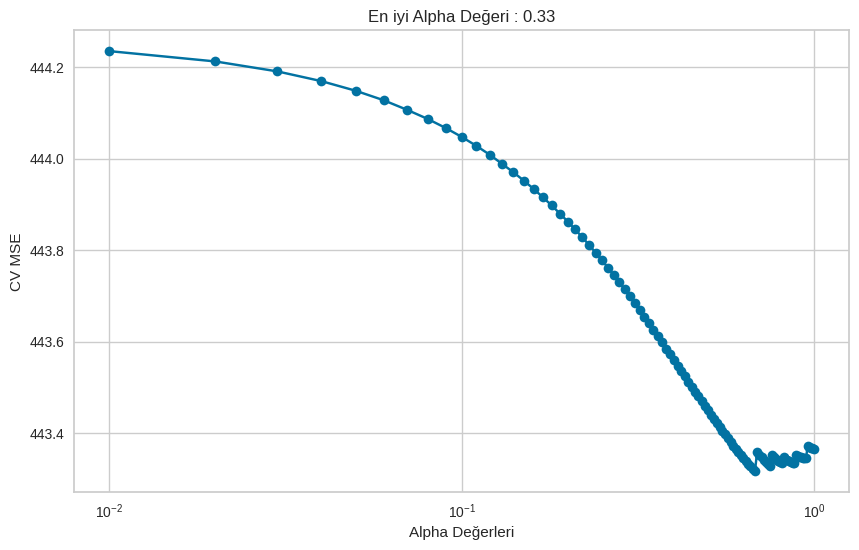

In [ ]:
best_alpha = lasso_cv_model.alpha_
plt.figure(figsize=(10, 6))

plt.plot(alpha_space, lasso_cv_model.mse_path_.mean(axis =-1), marker = "o")
plt.xscale("log")
plt.xlabel("Alpha Değerleri")
plt.ylabel("CV MSE")
plt.title(f"En iyi Alpha Değeri : {best_alpha:}")

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [ ]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.873577,0.870708
mae,13.845705,14.285035
mse,441.301451,466.577483
rmse,21.007176,21.600405


In [ ]:
pd.concat([lsc, ls, rs, rcs, lss, lcs], axis = 1)

,linearscaled_train,linearscaled_test,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.873625,0.870801,0.873625,0.870801,0.873625,0.870811,0.873625,0.870811,0.873297,0.870121,0.873577,0.870708
mae,13.782464,14.231951,13.782464,14.231951,13.782393,14.231283,13.782393,14.231283,13.998350,14.437069,13.845705,14.285035
mse,441.134541,466.243924,441.134541,466.243924,441.134751,466.205535,441.134751,466.205535,442.279424,468.698624,441.301451,466.577483
rmse,21.003203,21.592682,21.003203,21.592682,21.003208,21.591793,21.003208,21.591793,21.030440,21.649449,21.007176,21.600405


##MultiColinearity

In [ ]:
def color_red(val):  # google bulduğunuz kodu kendi kodumuza uyarlarız  ve yazılarn renklerini değiştiriz

    if val > 0.90 and val <= 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [ ]:
pd.DataFrame(X).corr().style.applymap(color_red)

,Engine_Size,Fuel_Comb,Fuel_Hwy,Fuel_City
Engine_Size,1.000000,0.820146,0.766817,0.834228
Fuel_Comb,0.820146,1.000000,0.978607,0.994052
Fuel_Hwy,0.766817,0.978607,1.000000,0.950811
Fuel_City,0.834228,0.994052,0.950811,1.000000


In [ ]:
import statsmodels.api as sm


In [ ]:

selected_columns = ['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)']
df_selected = df[selected_columns]


X = df_selected.drop('CO2 Emissions(g/km)', axis=1)
y = df_selected['CO2 Emissions(g/km)']

# shortened names of columns
X.columns = ['Engine_Size', 'Fuel_Comb', 'Fuel_Hwy', 'Fuel_City']
y.name = 'CO2_Emissions'

# Modeli
X = sm.add_constant(X)  # add constant
model = sm.OLS(y, X).fit()

# model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:29:38   Log-Likelihood:                -28075.
No. Observations:                6282   AIC:                         5.616e+04
Df Residuals:                    6277   BIC:                         5.619e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          62.8399      1.137     55.268      0.000      60.611      65.069
Engine_Size    13.3191      0.358     37.158      0.000      12.616      14.022
Fuel_Comb       8.9426      6.419      1.393      0.164      -3.641      21.526
Fuel_Hwy        0.8356      2.919      0.286      0.775      -4.887       6.558
Fuel_City       3.1797      3.538      0.899      0.369      -3.755      10.115
==============================================================================
Omnibus:                     1883.437   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6817.619
Skew:                          -1.475   Prob(JB):                         0.00
Kurtosis:                       7.165   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Lasso 0.33 alpha ile model oluşturma

In [ ]:
# Lasso regresyon modelini oluşturun
alpha_value = 0.33
lasso_model = Lasso(alpha=alpha_value)


lasso_model.fit(X_train_scaled, y_train)


y_train_pred = lasso_model.predict(X_train_scaled)


y_test_pred = lasso_model.predict(X_test)



In [ ]:
lss_033 = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv033")
lss_033

,lasso_cv033_train,lasso_cv033_test
R2,0.873577,0.870708
mae,13.845705,14.285035
mse,441.301451,466.577483
rmse,21.007176,21.600405


##ELASTIC NET

In [ ]:
from sklearn.model_selection import GridSearchCV # GridSearch ileCV yi de ayni anda yapiyor

In [ ]:

# Lasso regresyon modeli
lasso_model = Lasso(max_iter=100000, random_state=42)

# GridSearchCV için alpha değerleri
param_grid = {'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1]}

# GridSearchCV modeli
grid_model = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=2)


grid_model.fit(X_train_scaled, y_train)

# En iyi parametreler ve skor
print(f'En iyi parametreler: {grid_model.best_params_}')
print(f'En iyi skor: {grid_model.best_score_}')


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ........................................alpha=0.012; total time=   0.0s
[CV] END ........................................alpha=0.012; total time=   0.1s
[CV] END ........................................alpha=0.012; total time=   0.1s
[CV] END ........................................alpha=0.012; total time=   0.0s
[CV] END ........................................alpha=0.012; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ........................................

In [ ]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
gs =train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gs

,GridSearch_train,GridSearch_test
R2,0.873599,0.870790
mae,13.819487,14.259638
mse,441.226277,466.281839
rmse,21.005387,21.593560


In [ ]:
pd.concat([lsc, ls, rs, rcs, lss, lcs, lss_033, gs], axis = 1)

,linearscaled_train,linearscaled_test,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,lasso_cv033_train,lasso_cv033_test,GridSearch_train,GridSearch_test
R2,0.873625,0.870801,0.873625,0.870801,0.873625,0.870811,0.873625,0.870811,0.873297,0.870121,0.873577,0.870708,0.873577,0.870708,0.873599,0.870790
mae,13.782464,14.231951,13.782464,14.231951,13.782393,14.231283,13.782393,14.231283,13.998350,14.437069,13.845705,14.285035,13.845705,14.285035,13.819487,14.259638
mse,441.134541,466.243924,441.134541,466.243924,441.134751,466.205535,441.134751,466.205535,442.279424,468.698624,441.301451,466.577483,441.301451,466.577483,441.226277,466.281839
rmse,21.003203,21.592682,21.003203,21.592682,21.003208,21.591793,21.003208,21.591793,21.030440,21.649449,21.007176,21.600405,21.007176,21.600405,21.005387,21.593560


#Polynomial features